# 토큰화(Tokenization), 벡터화(Vectorization), 임베딩(Embedding) 실습

이 노트북에서는 자연어 처리의 기본 개념인 토큰화, 벡터화, 임베딩에 대해 실습을 통해 학습합니다.

## 목차
1. [토큰화(Tokenization)](#1-토큰화tokenization)
2. [벡터화(Vectorization)](#2-벡터화vectorization)
3. [임베딩(Embedding)](#3-임베딩embedding)
4. [종합 실습](#4-종합-실습)


In [20]:
!pip install numpy pandas matplotlib seaborn scikit-learn nltk 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우용
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 기호 깨짐 방지


In [27]:
# 필요한 라이브러리 설치 및 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import re
import nltk
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 설치 완료!")


라이브러리 설치 완료!


## 1. 토큰화(Tokenization)

토큰화는 텍스트를 의미 있는 작은 단위(토큰)로 나누는 과정입니다. 이는 자연어 처리의 첫 번째 단계로, 컴퓨터가 텍스트를 이해할 수 있도록 구조화하는 작업입니다.

### 1.1 기본 토큰화 방법


In [8]:
# 예시 텍스트
text = """
자연어 처리는 컴퓨터가 인간의 언어를 이해하고 분석하는 기술입니다.
Machine learning and deep learning are important technologies in NLP.
토큰화, 벡터화, 임베딩은 NLP의 핵심 개념입니다!
"""

print("원본 텍스트:")
print(text)
print("\n" + "="*50 + "\n")

# 1. 공백 기반 토큰화
def whitespace_tokenize(text):
    return text.split()

tokens_whitespace = whitespace_tokenize(text)
print("1. 공백 기반 토큰화:")
print(tokens_whitespace[:10])  # 처음 10개만 출력
print(f"총 토큰 개수: {len(tokens_whitespace)}")
print("\n" + "-"*30 + "\n")


원본 텍스트:

자연어 처리는 컴퓨터가 인간의 언어를 이해하고 분석하는 기술입니다.
Machine learning and deep learning are important technologies in NLP.
토큰화, 벡터화, 임베딩은 NLP의 핵심 개념입니다!



1. 공백 기반 토큰화:
['자연어', '처리는', '컴퓨터가', '인간의', '언어를', '이해하고', '분석하는', '기술입니다.', 'Machine', 'learning']
총 토큰 개수: 24

------------------------------



In [9]:
# 2. 정규표현식 기반 토큰화
def regex_tokenize(text):
    # 단어만 추출 (알파벳, 한글, 숫자)
    pattern = r'\b\w+\b'
    return re.findall(pattern, text)

tokens_regex = regex_tokenize(text)
print("2. 정규표현식 기반 토큰화:")
print(tokens_regex)
print(f"총 토큰 개수: {len(tokens_regex)}")
print("\n" + "-"*30 + "\n")

# 3. 문장 기반 토큰화
def sentence_tokenize(text):
    # 간단한 문장 분리 (마침표, 느낌표, 물음표 기준)
    sentences = re.split(r'[.!?]+', text.strip())
    return [s.strip() for s in sentences if s.strip()]

sentences = sentence_tokenize(text)
print("3. 문장 기반 토큰화:")
for i, sentence in enumerate(sentences, 1):
    print(f"문장 {i}: {sentence}")
print(f"총 문장 개수: {len(sentences)}")
print("\n" + "-"*30 + "\n")


2. 정규표현식 기반 토큰화:
['자연어', '처리는', '컴퓨터가', '인간의', '언어를', '이해하고', '분석하는', '기술입니다', 'Machine', 'learning', 'and', 'deep', 'learning', 'are', 'important', 'technologies', 'in', 'NLP', '토큰화', '벡터화', '임베딩은', 'NLP의', '핵심', '개념입니다']
총 토큰 개수: 24

------------------------------

3. 문장 기반 토큰화:
문장 1: 자연어 처리는 컴퓨터가 인간의 언어를 이해하고 분석하는 기술입니다
문장 2: Machine learning and deep learning are important technologies in NLP
문장 3: 토큰화, 벡터화, 임베딩은 NLP의 핵심 개념입니다
총 문장 개수: 3

------------------------------



In [34]:
# 4. NLTK를 사용한 고급 토큰화
try:
    import nltk
    # NLTK 데이터 다운로드 (필요시)
    try:
        nltk.data.find('tokenizers/punkt')
    except LookupError:
        nltk.download('punkt')
    
    from nltk.tokenize import word_tokenize, sent_tokenize
    
    # 영어 텍스트 예시
    english_text = "Machine learning and deep learning are important technologies in NLP. What do you think?"
    
    # NLTK 단어 토큰화
    nltk_words = word_tokenize(english_text)
    print("4. NLTK 단어 토큰화 (영어):")
    print(nltk_words)
    print(f"총 토큰 개수: {len(nltk_words)}")
    print("\n")
    
    # NLTK 문장 토큰화
    nltk_sentences = sent_tokenize(english_text)
    print("NLTK 문장 토큰화 (영어):")
    for i, sentence in enumerate(nltk_sentences, 1):
        print(f"문장 {i}: {sentence}")
    
except ImportError:
    print("NLTK가 설치되지 않았습니다. pip install nltk 로 설치해주세요.")

print("\n" + "="*50 + "\n")


4. NLTK 단어 토큰화 (영어):
['Machine', 'learning', 'and', 'deep', 'learning', 'are', 'important', 'technologies', 'in', 'NLP', '.', 'What', 'do', 'you', 'think', '?']
총 토큰 개수: 16


NLTK 문장 토큰화 (영어):
문장 1: Machine learning and deep learning are important technologies in NLP.
문장 2: What do you think?




In [35]:
# 벡터화를 위한 문서 집합 준비
documents = [
    "자연어 처리는 재미있다",
    "기계 학습은 흥미롭다", 
    "딥러닝과 자연어 처리가 결합되면 강력하다",
    "파이썬은 기계 학습에 좋은 도구다",
    "자연어 처리 기술이 발전하고 있다"
]

print("문서 집합:")
for i, doc in enumerate(documents, 1):
    print(f"문서 {i}: {doc}")

print("\\n" + "="*50 + "\\n")


문서 집합:
문서 1: 자연어 처리는 재미있다
문서 2: 기계 학습은 흥미롭다
문서 3: 딥러닝과 자연어 처리가 결합되면 강력하다
문서 4: 파이썬은 기계 학습에 좋은 도구다
문서 5: 자연어 처리 기술이 발전하고 있다
\n==================================================\n


In [36]:
# 1. Bag of Words (CountVectorizer)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(documents)

# 어휘 사전 확인
vocab = vectorizer.get_feature_names_out()
print("어휘 사전 (Vocabulary):")
print(vocab)
print(f"어휘 크기: {len(vocab)}")
print("\\n")

# BoW 행렬 확인
print("Bag of Words 행렬:")
bow_df = pd.DataFrame(bow_matrix.toarray(), 
                      columns=vocab,
                      index=[f"문서{i}" for i in range(1, len(documents)+1)])
print(bow_df)
print(f"\\n행렬 크기: {bow_matrix.shape}")
print(f"설명: {bow_matrix.shape[0]}개 문서 × {bow_matrix.shape[1]}개 어휘")


어휘 사전 (Vocabulary):
['강력하다' '결합되면' '기계' '기술이' '도구다' '딥러닝과' '발전하고' '있다' '자연어' '재미있다' '좋은' '처리'
 '처리가' '처리는' '파이썬은' '학습에' '학습은' '흥미롭다']
어휘 크기: 18
\n
Bag of Words 행렬:
     강력하다  결합되면  기계  기술이  도구다  딥러닝과  발전하고  있다  자연어  재미있다  좋은  처리  처리가  처리는  \
문서1     0     0   0    0    0     0     0   0    1     1   0   0    0    1   
문서2     0     0   1    0    0     0     0   0    0     0   0   0    0    0   
문서3     1     1   0    0    0     1     0   0    1     0   0   0    1    0   
문서4     0     0   1    0    1     0     0   0    0     0   1   0    0    0   
문서5     0     0   0    1    0     0     1   1    1     0   0   1    0    0   

     파이썬은  학습에  학습은  흥미롭다  
문서1     0    0    0     0  
문서2     0    0    1     1  
문서3     0    0    0     0  
문서4     1    1    0     0  
문서5     0    0    0     0  
\n행렬 크기: (5, 18)
설명: 5개 문서 × 18개 어휘


### 2.2 TF-IDF (Term Frequency-Inverse Document Frequency)


\n==================================================\n
TF-IDF 행렬:
      강력하다   결합되면     기계    기술이    도구다   딥러닝과   발전하고     있다    자연어   재미있다  \
문서1  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.428  0.639   
문서2  0.000  0.000  0.496  0.000  0.000  0.000  0.000  0.000  0.000  0.000   
문서3  0.474  0.474  0.000  0.000  0.000  0.474  0.000  0.000  0.318  0.000   
문서4  0.000  0.000  0.374  0.000  0.464  0.000  0.000  0.000  0.000  0.000   
문서5  0.000  0.000  0.000  0.474  0.000  0.000  0.474  0.474  0.318  0.000   

        좋은     처리    처리가    처리는   파이썬은    학습에    학습은   흥미롭다  
문서1  0.000  0.000  0.000  0.639  0.000  0.000  0.000  0.000  
문서2  0.000  0.000  0.000  0.000  0.000  0.000  0.614  0.614  
문서3  0.000  0.000  0.474  0.000  0.000  0.000  0.000  0.000  
문서4  0.464  0.000  0.000  0.000  0.464  0.464  0.000  0.000  
문서5  0.000  0.474  0.000  0.000  0.000  0.000  0.000  0.000  
\n------------------------------\n
BoW vs TF-IDF 비교 (첫 번째 문서):
BoW 값:
{'강력하다': 0, '결합되면': 0, '기계': 

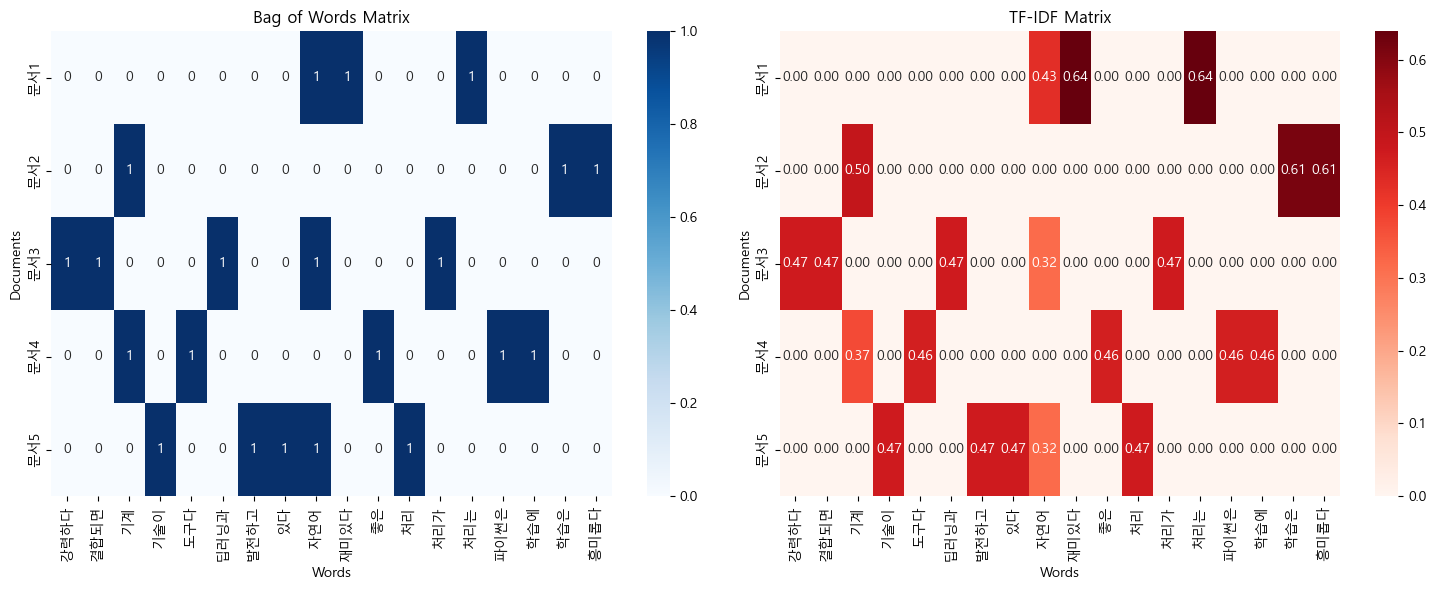

In [37]:
# 2. TF-IDF 벡터화
print("\\n" + "="*50 + "\\n")

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# TF-IDF 행렬 확인
print("TF-IDF 행렬:")
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), 
                        columns=tfidf_vectorizer.get_feature_names_out(),
                        index=[f"문서{i}" for i in range(1, len(documents)+1)])
print(tfidf_df.round(3))  # 소수점 3자리까지만 표시

print("\\n" + "-"*30 + "\\n")

# BoW vs TF-IDF 비교
print("BoW vs TF-IDF 비교 (첫 번째 문서):")
print("BoW 값:")
print(bow_df.iloc[0].to_dict())
print("\\nTF-IDF 값:")
print(dict(zip(tfidf_df.columns, tfidf_df.iloc[0].round(3))))

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# BoW 히트맵
sns.heatmap(bow_df, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Bag of Words Matrix')
ax1.set_xlabel('Words')
ax1.set_ylabel('Documents')

# TF-IDF 히트맵
sns.heatmap(tfidf_df, annot=True, fmt='.2f', cmap='Reds', ax=ax2)
ax2.set_title('TF-IDF Matrix')
ax2.set_xlabel('Words')
ax2.set_ylabel('Documents')

plt.tight_layout()
plt.show()


## 3. 임베딩(Embedding)

임베딩은 단어나 문서를 고차원 벡터 공간에 매핑하는 과정입니다. 벡터화와 달리 임베딩은 단어 간의 의미적 관계를 보존하며, 유사한 의미의 단어들이 벡터 공간에서 가까이 위치하도록 합니다.

### 3.1 간단한 원-핫 인코딩


In [30]:
# 3. 임베딩 실습
print("\\n" + "="*50 + "\\n")

# 원-핫 인코딩 예시
words = ["자연어", "처리", "기계", "학습", "딥러닝"]
word_to_index = {word: i for i, word in enumerate(words)}
index_to_word = {i: word for i, word in enumerate(words)}

print("단어 사전:")
print(word_to_index)
print("\\n")

def one_hot_encode(word, vocab_size):
    vector = np.zeros(vocab_size)
    if word in word_to_index:
        vector[word_to_index[word]] = 1
    return vector

# 원-핫 벡터 생성
print("원-핫 인코딩 결과:")
for word in words:
    vector = one_hot_encode(word, len(words))
    print(f"{word}: {vector}")

print("\\n" + "-"*30 + "\\n")

# 원-핫 인코딩의 문제점 설명
print("원-핫 인코딩의 문제점:")
print("1. 희소성(Sparsity): 대부분의 값이 0")
print("2. 차원의 저주: 어휘 크기만큼 벡터 차원 증가")
print("3. 의미적 관계 무시: 유사한 단어도 동일한 거리")

# 코사인 유사도 계산
def cosine_similarity(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

vec1 = one_hot_encode("자연어", len(words))
vec2 = one_hot_encode("처리", len(words))
vec3 = one_hot_encode("기계", len(words))

print(f"\\n코사인 유사도:")
print(f"'자연어' vs '처리': {cosine_similarity(vec1, vec2):.3f}")
print(f"'자연어' vs '기계': {cosine_similarity(vec1, vec3):.3f}")
print("→ 모든 단어 간 유사도가 0 (의미적 관계 반영 안됨)")


\n==================================================\n
단어 사전:
{'자연어': 0, '처리': 1, '기계': 2, '학습': 3, '딥러닝': 4}
\n
원-핫 인코딩 결과:
자연어: [1. 0. 0. 0. 0.]
처리: [0. 1. 0. 0. 0.]
기계: [0. 0. 1. 0. 0.]
학습: [0. 0. 0. 1. 0.]
딥러닝: [0. 0. 0. 0. 1.]
\n------------------------------\n
원-핫 인코딩의 문제점:
1. 희소성(Sparsity): 대부분의 값이 0
2. 차원의 저주: 어휘 크기만큼 벡터 차원 증가
3. 의미적 관계 무시: 유사한 단어도 동일한 거리
\n코사인 유사도:
'자연어' vs '처리': 0.000
'자연어' vs '기계': 0.000
→ 모든 단어 간 유사도가 0 (의미적 관계 반영 안됨)


### 3.2 밀집 임베딩 (Dense Embedding)


In [31]:
# 간단한 밀집 임베딩 예시 (가상의 임베딩)
print("\\n" + "="*50 + "\\n")

# 가상의 3차원 밀집 임베딩 (실제로는 Word2Vec, GloVe 등으로 학습)
dense_embeddings = {
    "자연어": np.array([0.8, 0.3, 0.1]),
    "처리": np.array([0.7, 0.4, 0.2]),
    "기계": np.array([0.2, 0.8, 0.6]),
    "학습": np.array([0.1, 0.9, 0.7]),
    "딥러닝": np.array([0.3, 0.7, 0.8])
}

print("밀집 임베딩 (3차원):")
for word, embedding in dense_embeddings.items():
    print(f"{word}: {embedding}")

print("\\n" + "-"*30 + "\\n")

# 밀집 임베딩의 장점 확인
print("밀집 임베딩의 의미적 유사도:")
nlp_words = ["자연어", "처리"]
ml_words = ["기계", "학습", "딥러닝"]

# NLP 관련 단어들 간 유사도
nlp_sim = cosine_similarity(dense_embeddings["자연어"], dense_embeddings["처리"])
print(f"'자연어' vs '처리' (NLP 관련): {nlp_sim:.3f}")

# ML 관련 단어들 간 유사도  
ml_sim = cosine_similarity(dense_embeddings["기계"], dense_embeddings["학습"])
print(f"'기계' vs '학습' (ML 관련): {ml_sim:.3f}")

# 서로 다른 도메인 간 유사도
cross_sim = cosine_similarity(dense_embeddings["자연어"], dense_embeddings["기계"])
print(f"'자연어' vs '기계' (도메인 다름): {cross_sim:.3f}")

print("\\n→ 의미적으로 관련된 단어들이 더 높은 유사도를 가짐")


\n==================================================\n
밀집 임베딩 (3차원):
자연어: [0.8 0.3 0.1]
처리: [0.7 0.4 0.2]
기계: [0.2 0.8 0.6]
학습: [0.1 0.9 0.7]
딥러닝: [0.3 0.7 0.8]
\n------------------------------\n
밀집 임베딩의 의미적 유사도:
'자연어' vs '처리' (NLP 관련): 0.980
'기계' vs '학습' (ML 관련): 0.994
'자연어' vs '기계' (도메인 다름): 0.524
\n→ 의미적으로 관련된 단어들이 더 높은 유사도를 가짐


\n==================================================\n


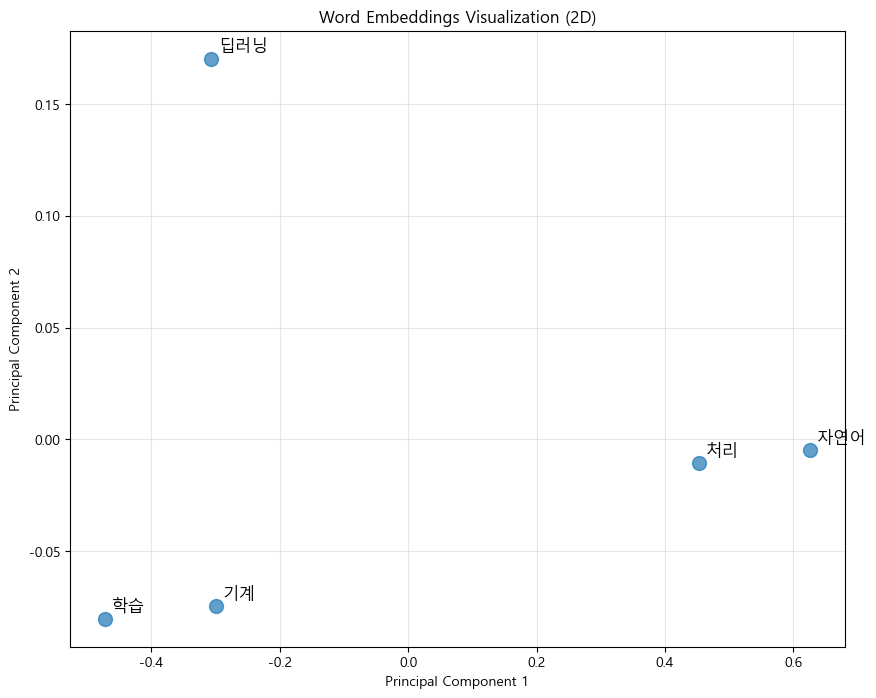

시각화 설명:
- 가까이 위치한 단어들은 의미적으로 유사함
- 실제 Word2Vec, GloVe 등에서는 수백 차원의 벡터를 사용
- t-SNE, UMAP 등으로 고차원 임베딩을 2D로 시각화 가능


In [32]:
# 임베딩 시각화 (2D 평면에 투영)
print("\\n" + "="*50 + "\\n")

# 3차원 → 2차원 투영을 위해 PCA 사용
embedding_matrix = np.array(list(dense_embeddings.values()))
word_labels = list(dense_embeddings.keys())

# PCA로 2차원으로 축소
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embedding_matrix)

# 시각화
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=100, alpha=0.7)

# 단어 라벨 추가
for i, word in enumerate(word_labels):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=12)

plt.title('Word Embeddings Visualization (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

print("시각화 설명:")
print("- 가까이 위치한 단어들은 의미적으로 유사함")
print("- 실제 Word2Vec, GloVe 등에서는 수백 차원의 벡터를 사용")
print("- t-SNE, UMAP 등으로 고차원 임베딩을 2D로 시각화 가능")


In [33]:
# 종합 실습: 텍스트 전처리 파이프라인
print("\\n" + "="*60 + "\\n")
print("종합 실습: 텍스트 → 토큰화 → 벡터화 → 임베딩 파이프라인")
print("="*60)

# 실습용 텍스트 데이터
sample_texts = [
    "인공지능과 머신러닝은 현대 기술의 핵심이다",
    "자연어 처리 기술이 빠르게 발전하고 있다",
    "딥러닝 모델은 복잡한 패턴을 학습할 수 있다",
    "데이터 과학자들이 Python을 많이 사용한다",
    "빅데이터 분석에는 다양한 도구가 필요하다"
]

print("\\n1. 원본 텍스트:")
for i, text in enumerate(sample_texts, 1):
    print(f"  {i}. {text}")

# 단계별 처리
print("\\n2. 토큰화 결과:")
tokenized_texts = []
for i, text in enumerate(sample_texts, 1):
    tokens = regex_tokenize(text)
    tokenized_texts.append(tokens)
    print(f"  {i}. {tokens}")

print("\\n3. BoW 벡터화:")
bow_vectorizer = CountVectorizer()
bow_vectors = bow_vectorizer.fit_transform(sample_texts)
print(f"  행렬 크기: {bow_vectors.shape}")
print(f"  어휘 크기: {len(bow_vectorizer.get_feature_names_out())}")
print(f"  어휘: {bow_vectorizer.get_feature_names_out()[:10]}...")  # 처음 10개만

print("\\n4. TF-IDF 벡터화:")
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(sample_texts)
print(f"  행렬 크기: {tfidf_vectors.shape}")
print(f"  첫 번째 문서의 상위 5개 TF-IDF 값:")

# 첫 번째 문서의 TF-IDF 값 정렬
first_doc_tfidf = tfidf_vectors[0].toarray()[0]
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = list(zip(feature_names, first_doc_tfidf))
tfidf_scores.sort(key=lambda x: x[1], reverse=True)

for word, score in tfidf_scores[:5]:
    if score > 0:
        print(f"    {word}: {score:.4f}")

print("\\n5. 문서 간 유사도 계산 (TF-IDF 기반):")
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_vectors)
print("  유사도 행렬 (처음 3x3):")
print(similarity_matrix[:3, :3].round(3))


\n============================================================\n
종합 실습: 텍스트 → 토큰화 → 벡터화 → 임베딩 파이프라인
\n1. 원본 텍스트:
  1. 인공지능과 머신러닝은 현대 기술의 핵심이다
  2. 자연어 처리 기술이 빠르게 발전하고 있다
  3. 딥러닝 모델은 복잡한 패턴을 학습할 수 있다
  4. 데이터 과학자들이 Python을 많이 사용한다
  5. 빅데이터 분석에는 다양한 도구가 필요하다
\n2. 토큰화 결과:
  1. ['인공지능과', '머신러닝은', '현대', '기술의', '핵심이다']
  2. ['자연어', '처리', '기술이', '빠르게', '발전하고', '있다']
  3. ['딥러닝', '모델은', '복잡한', '패턴을', '학습할', '수', '있다']
  4. ['데이터', '과학자들이', 'Python을', '많이', '사용한다']
  5. ['빅데이터', '분석에는', '다양한', '도구가', '필요하다']
\n3. BoW 벡터화:
  행렬 크기: (5, 26)
  어휘 크기: 26
  어휘: ['python을' '과학자들이' '기술의' '기술이' '다양한' '데이터' '도구가' '딥러닝' '많이' '머신러닝은']...
\n4. TF-IDF 벡터화:
  행렬 크기: (5, 26)
  첫 번째 문서의 상위 5개 TF-IDF 값:
    기술의: 0.4472
    머신러닝은: 0.4472
    인공지능과: 0.4472
    핵심이다: 0.4472
    현대: 0.4472
\n5. 문서 간 유사도 계산 (TF-IDF 기반):
  유사도 행렬 (처음 3x3):
[[1.    0.    0.   ]
 [0.    1.    0.115]
 [0.    0.115 1.   ]]
